In [1]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox

In [3]:
df = pd.read_csv('Pasion et al dataset.csv', sep=',', header=0)
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [4]:
df.isnull().sum() #missing value check

Location         0
Date             0
Time             0
Latitude         0
Longitude        0
Altitude         0
YRMODAHRMI       0
Month            0
Hour             0
Season           0
Humidity         0
AmbientTemp      0
PolyPwr          0
Wind.Speed       0
Visibility       0
Pressure         0
Cloud.Ceiling    0
dtype: int64

In [5]:
print(df.dtypes)

Location          object
Date               int64
Time               int64
Latitude         float64
Longitude        float64
Altitude           int64
YRMODAHRMI       float64
Month              int64
Hour               int64
Season            object
Humidity         float64
AmbientTemp      float64
PolyPwr          float64
Wind.Speed         int64
Visibility       float64
Pressure         float64
Cloud.Ceiling      int64
dtype: object


# Preprocessing Time Variables

In [6]:
df['DateTime'] = df['Date'].astype(str) + df['Time'].astype(str)
df['DateTime'].head()

0    201712031145
1    201712031315
2    201712031330
3    201712041230
4    201712041415
Name: DateTime, dtype: object

In [7]:
df['Timestamp'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M')

In [8]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,DateTime,Timestamp
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722,201712031145,2017-12-03 11:45:00
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23,201712031315,2017-12-03 13:15:00
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32,201712031330,2017-12-03 13:30:00
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6,201712041230,2017-12-04 12:30:00
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9,201712041415,2017-12-04 14:15:00


In [9]:
print(df.dtypes)

Location                 object
Date                      int64
Time                      int64
Latitude                float64
Longitude               float64
Altitude                  int64
YRMODAHRMI              float64
Month                     int64
Hour                      int64
Season                   object
Humidity                float64
AmbientTemp             float64
PolyPwr                 float64
Wind.Speed                int64
Visibility              float64
Pressure                float64
Cloud.Ceiling             int64
DateTime                 object
Timestamp        datetime64[ns]
dtype: object


# Categorical Variables dummy-encoding

In [10]:
df['Season'] = df['Season'].astype('category')
df['Location'] = df['Location'].astype('category')

In [11]:
dummies = pd.get_dummies(df.Season)
df = df.drop(columns='Season').merge(dummies,left_index=True, right_index=True)
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,...,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,DateTime,Timestamp,Fall,Spring,Summer,Winter
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,81.71997,...,5,10.0,1010.6,722,201712031145,2017-12-03 11:45:00,0,0,0,1
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,96.64917,...,0,10.0,1011.3,23,201712031315,2017-12-03 13:15:00,0,0,0,1
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,93.61572,...,5,10.0,1011.6,32,201712031330,2017-12-03 13:30:00,0,0,0,1
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,77.21558,...,5,2.0,1024.4,6,201712041230,2017-12-04 12:30:00,0,0,0,1
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,54.80347,...,3,3.0,1023.7,9,201712041415,2017-12-04 14:15:00,0,0,0,1


In [12]:
dummies = pd.get_dummies(df.Location)
df = df.drop(columns='Location').merge(dummies,left_index=True, right_index=True)
df.head()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,...,Hill Weber,JDMT,Kahului,MNANG,Malmstrom,March AFB,Offutt,Peterson,Travis,USAFA
0,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,81.71997,12.86919,...,0,0,0,0,0,0,0,0,0,0
1,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,96.64917,9.66415,...,0,0,0,0,0,0,0,0,0,0
2,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,93.61572,15.44983,...,0,0,0,0,0,0,0,0,0,0
3,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,77.21558,10.36659,...,0,0,0,0,0,0,0,0,0,0
4,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,54.80347,16.85471,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(df.dtypes)

Date                      int64
Time                      int64
Latitude                float64
Longitude               float64
Altitude                  int64
YRMODAHRMI              float64
Month                     int64
Hour                      int64
Humidity                float64
AmbientTemp             float64
PolyPwr                 float64
Wind.Speed                int64
Visibility              float64
Pressure                float64
Cloud.Ceiling             int64
DateTime                 object
Timestamp        datetime64[ns]
Fall                      uint8
Spring                    uint8
Summer                    uint8
Winter                    uint8
Camp Murray               uint8
Grissom                   uint8
Hill Weber                uint8
JDMT                      uint8
Kahului                   uint8
MNANG                     uint8
Malmstrom                 uint8
March AFB                 uint8
Offutt                    uint8
Peterson                  uint8
Travis  

# Data Transformation

In [15]:
# transformed_Altitude, best_lambda = boxcox(df['Altitude']) <- not normal
transformed_PolyPwr, best_lambda = boxcox(df['PolyPwr'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


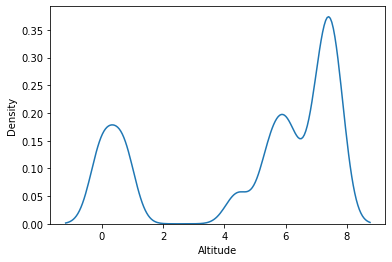

In [16]:
transformed_Altitude = np.log(df['Altitude'])
sns.distplot(transformed_Altitude, hist=False, kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


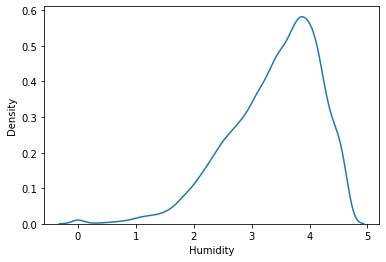

In [17]:
transformed_Humidity = np.log(df['Humidity']+1)
sns.distplot(transformed_Humidity, hist=False, kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


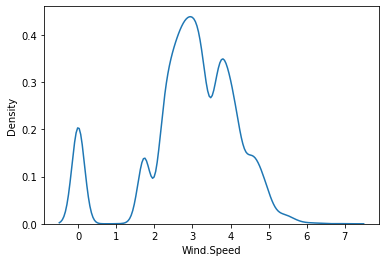

In [18]:
transformed_WindSpeed = np.sqrt(df['Wind.Speed'])
sns.distplot(transformed_WindSpeed, hist=False, kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


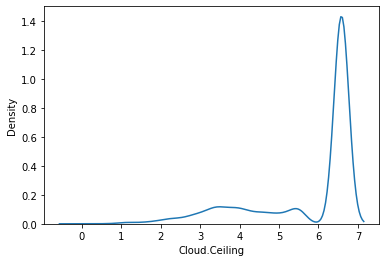

In [19]:
transformed_CloudCeiling = np.log(df['Cloud.Ceiling']+1)
sns.distplot(transformed_CloudCeiling, hist=False, kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


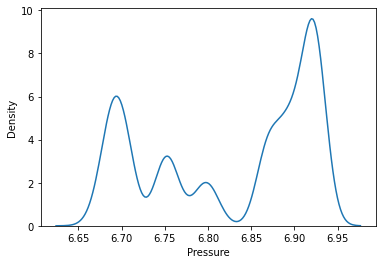

In [20]:
transformed_Pressure = np.log(df['Pressure']+1)
sns.distplot(transformed_Pressure, hist=False, kde=True)

# Feature Selection (before modeling)

Reduce redundant time variables

In [24]:
# reduce redundant time variables
df = df.drop(columns=['Date', 'Time', 'YRMODAHRMI','Month','Hour','DateTime'])

Drop Location dummy variables, as they're highly correlated with Latitude and Longitude anyway

In [42]:
df = df.drop(df.loc[:, 'Camp Murray':'USAFA'].columns, axis=1)

In [43]:
df.head()

,Latitude,Longitude,Altitude,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Timestamp,Fall,Spring,Summer,Winter
0,47.11,-122.57,84,81.71997,12.86919,2.42769,5,10.0,1010.6,722,2017-12-03 11:45:00,0,0,0,1
1,47.11,-122.57,84,96.64917,9.66415,2.46273,0,10.0,1011.3,23,2017-12-03 13:15:00,0,0,0,1
2,47.11,-122.57,84,93.61572,15.44983,4.46836,5,10.0,1011.6,32,2017-12-03 13:30:00,0,0,0,1
3,47.11,-122.57,84,77.21558,10.36659,1.65364,5,2.0,1024.4,6,2017-12-04 12:30:00,0,0,0,1
4,47.11,-122.57,84,54.80347,16.85471,6.57939,3,3.0,1023.7,9,2017-12-04 14:15:00,0,0,0,1


Low Variance (once transformed to normal)

In [44]:
df.var().apply(lambda x: '%.3f' % x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Latitude             39.990
Longitude           267.785
Altitude         593950.428
Humidity            567.536
AmbientTemp         152.938
PolyPwr              50.741
Wind.Speed           40.769
Visibility            1.828
Pressure           7261.708
Cloud.Ceiling     91145.650
Fall                  0.166
Spring                0.176
Summer                0.238
Winter                0.142
dtype: object

Highly Correlated Columns

In [45]:
df_num = df.drop(df.loc[:, 'Fall':'Winter'].columns, axis=1)
df_num.head()

,Latitude,Longitude,Altitude,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling,Timestamp
0,47.11,-122.57,84,81.71997,12.86919,2.42769,5,10.0,1010.6,722,2017-12-03 11:45:00
1,47.11,-122.57,84,96.64917,9.66415,2.46273,0,10.0,1011.3,23,2017-12-03 13:15:00
2,47.11,-122.57,84,93.61572,15.44983,4.46836,5,10.0,1011.6,32,2017-12-03 13:30:00
3,47.11,-122.57,84,77.21558,10.36659,1.65364,5,2.0,1024.4,6,2017-12-04 12:30:00
4,47.11,-122.57,84,54.80347,16.85471,6.57939,3,3.0,1023.7,9,2017-12-04 14:15:00


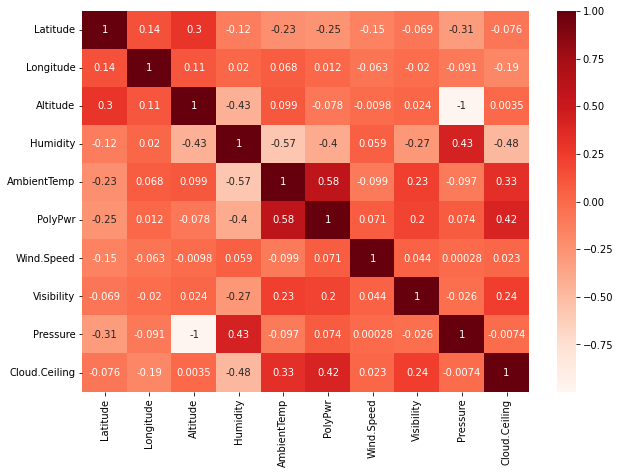

In [46]:
cor = df_num.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Have to choose which feature to drop between Pressure or Altitude -- both bimodal distributions